# Heart Disease Detection Project

**Project Idea**:
The goal of this project is to develop a system to detect the presence of heart disease in individuals based on key medical attributes provided in the dataset.

**Attributes Used**:
- `Age`: The age of the patient in years.
- `Sex`: The gender of the patient (1 = male, 0 = female).
- `CheastPainType`: Type of chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
- `RestingBP`: Resting blood pressure in mm Hg on admission to the hospital.
- `Cholesterol`: Serum cholesterol level in mg/dl.
- `FastingBS`: Fasting blood sugar level > 120 mg/dl (1 = true, 0 = false).
- `RestingECG`: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- `MaxHR`: Maximum heart rate achieved during exercise.
- `ExerciseAngina`: Exercise-induced angina (1 = yes, 0 = no).
- `Oldpeak`: ST depression induced by exercise relative to rest.
- `ST_Slope`: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
- `NumMajorVessels`: Number of major vessels (0-3) colored by fluoroscopy.
- `Thal`: Thalassemia type (0 = normal, 1 = fixed defect, 2 = reversible defect).
- `Target`: Indicates the presence of heart disease (1 = disease, 0 = no disease).

**Privacy Note**:
The dataset has been anonymized, with the names and social security numbers of the patients replaced by dummy values to protect privacy.

-----------------

## All libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the dataset
file_path = "D:\FCDS\Machin learning\ML_Final Project\heart.csv"
df = pd.read_csv(file_path)

In [3]:
# Shape of dataset
df.shape

(1025, 14)

In [4]:
# Rename the columns for better readability
df.columns = ['Age', 'Sex', 'CheastPainType', 'RestingBP', 
            'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [5]:
# Describe the dataset
df.describe()

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   CheastPainType   1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df['Target'].unique()

array([0, 1], dtype=int64)

**`Problem Overview 🚨🚨🚨`**

This is a **classification problem** where the **target variable** has two possible values:
- `0`: Represents one class.
- `1`: Represents the other class.

------------------

## Data Preprocessing

In [8]:
# Checking for missing values
df.isnull().sum()

Age                0
Sex                0
CheastPainType     0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

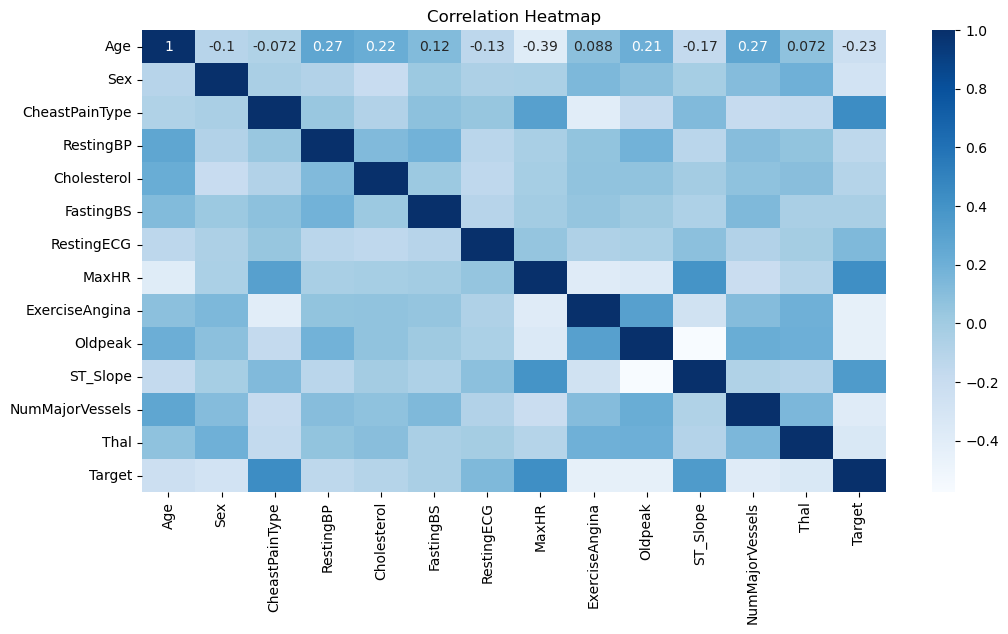

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
count_NoDisease = len(df[df.Target == 0])
count_HaveDisease = len(df[df.Target == 1])

print("Patience without heart problems: ", (count_NoDisease/1025)*100)
print("Patience with heart problems: ", (count_HaveDisease/1025)*100)

Patience without heart problems:  48.68292682926829
Patience with heart problems:  51.31707317073171


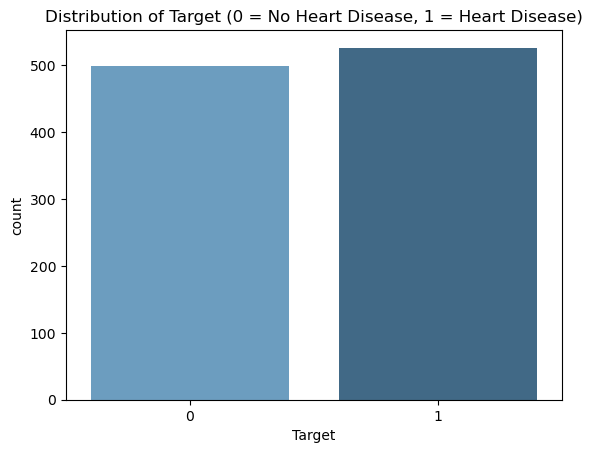

In [11]:
# Plot Target variable distribution
sns.countplot(x='Target', data=df, palette='Blues_d')
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [12]:
# Count unique values for each column
unique_counts_per_column = df.nunique()

print("Unique value counts for each column:")
print(unique_counts_per_column)

Unique value counts for each column:
Age                 41
Sex                  2
CheastPainType       4
RestingBP           49
Cholesterol        152
FastingBS            2
RestingECG           3
MaxHR               91
ExerciseAngina       2
Oldpeak             40
ST_Slope             3
NumMajorVessels      5
Thal                 4
Target               2
dtype: int64


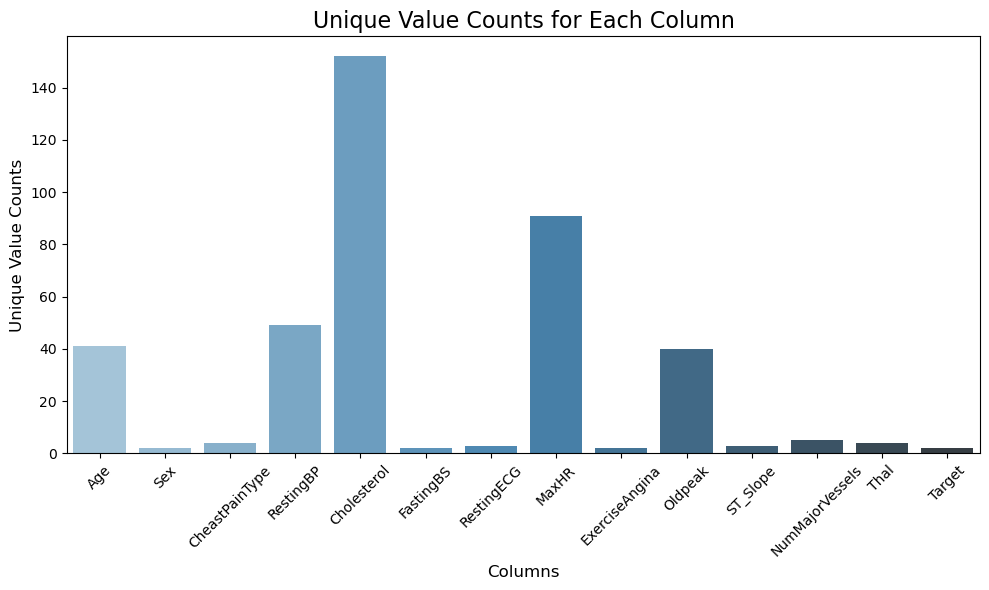

In [13]:
unique_counts_df = unique_counts_per_column.reset_index()
unique_counts_df.columns = ['Column', 'Unique Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=unique_counts_df, x='Column', y='Unique Count', palette='Blues_d')

plt.title('Unique Value Counts for Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Value Counts', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
# The Unique Values
unique_values = df.apply(lambda col: col.unique())

print(unique_values)

Age                [52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 3...
Sex                                                           [1, 0]
CheastPainType                                          [0, 1, 2, 3]
RestingBP          [125, 140, 145, 148, 138, 100, 114, 160, 120, ...
Cholesterol        [212, 203, 174, 294, 248, 318, 289, 249, 286, ...
FastingBS                                                     [0, 1]
RestingECG                                                 [1, 0, 2]
MaxHR              [168, 155, 125, 161, 106, 122, 140, 145, 144, ...
ExerciseAngina                                                [0, 1]
Oldpeak            [1.0, 3.1, 2.6, 0.0, 1.9, 4.4, 0.8, 3.2, 1.6, ...
ST_Slope                                                   [2, 0, 1]
NumMajorVessels                                      [2, 0, 1, 3, 4]
Thal                                                    [3, 2, 1, 0]
Target                                                        [0, 1]
dtype: object


C:\Users\Ayman Rezk\AppData\Local\Temp\ipykernel_21144\3042159945.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, bins=20, palette='Blues_d')
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayman Rezk\AppData\Local\Temp\ipykernel_21144\3042159945.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, bins=20, palette='Blues_d')
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayman R

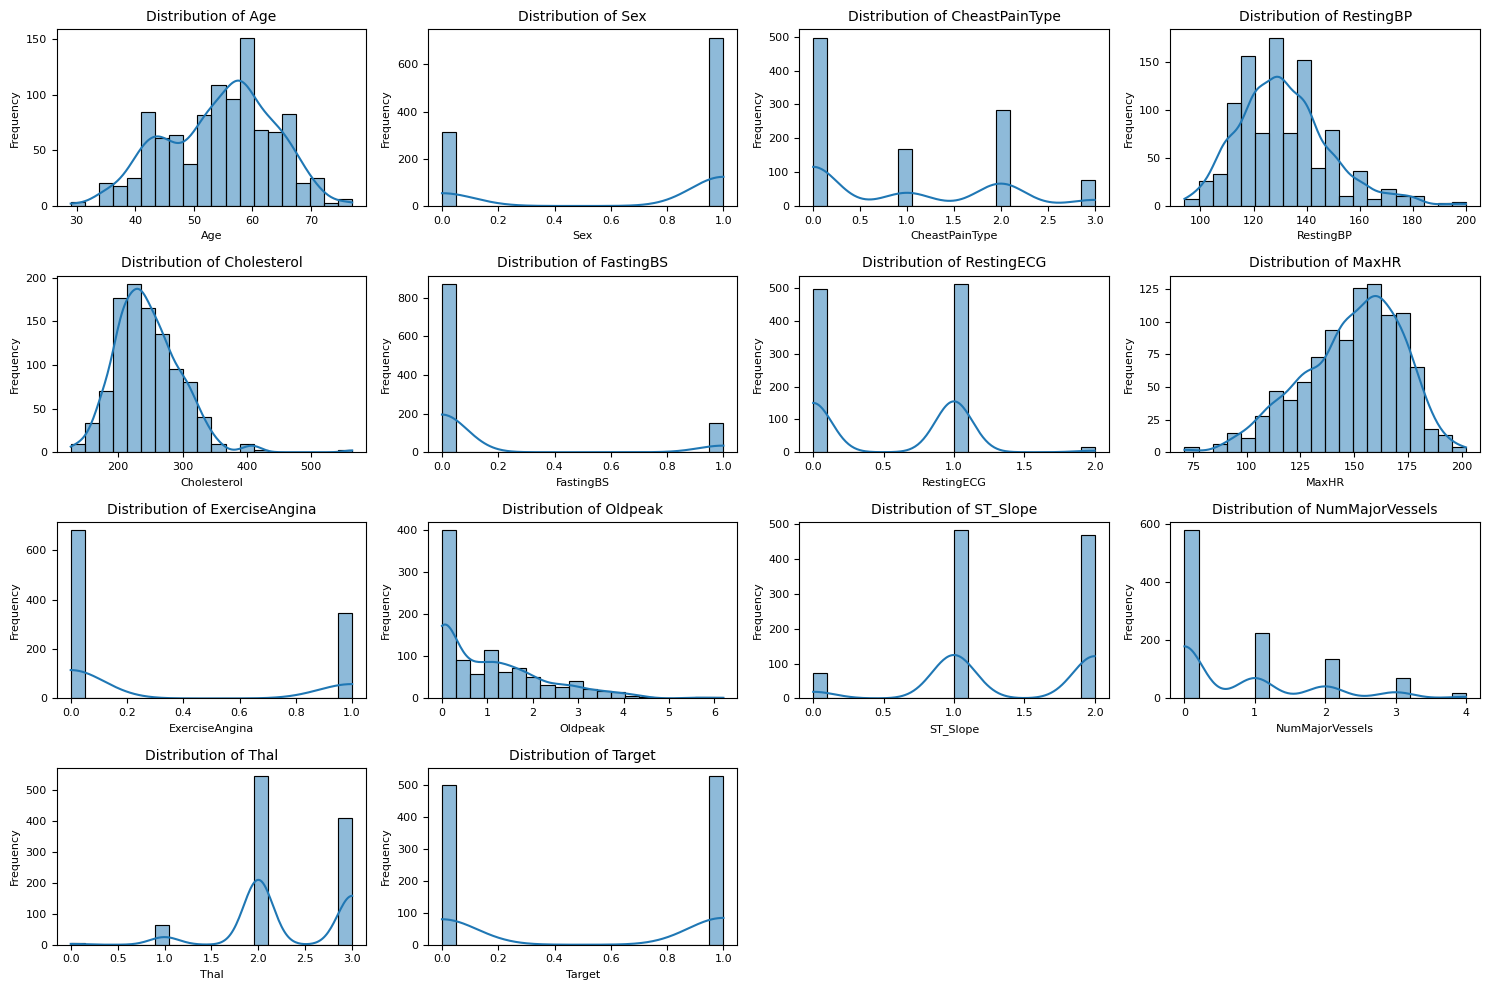

In [15]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(data=df, x=column, kde=True, bins=20, palette='Blues_d')
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

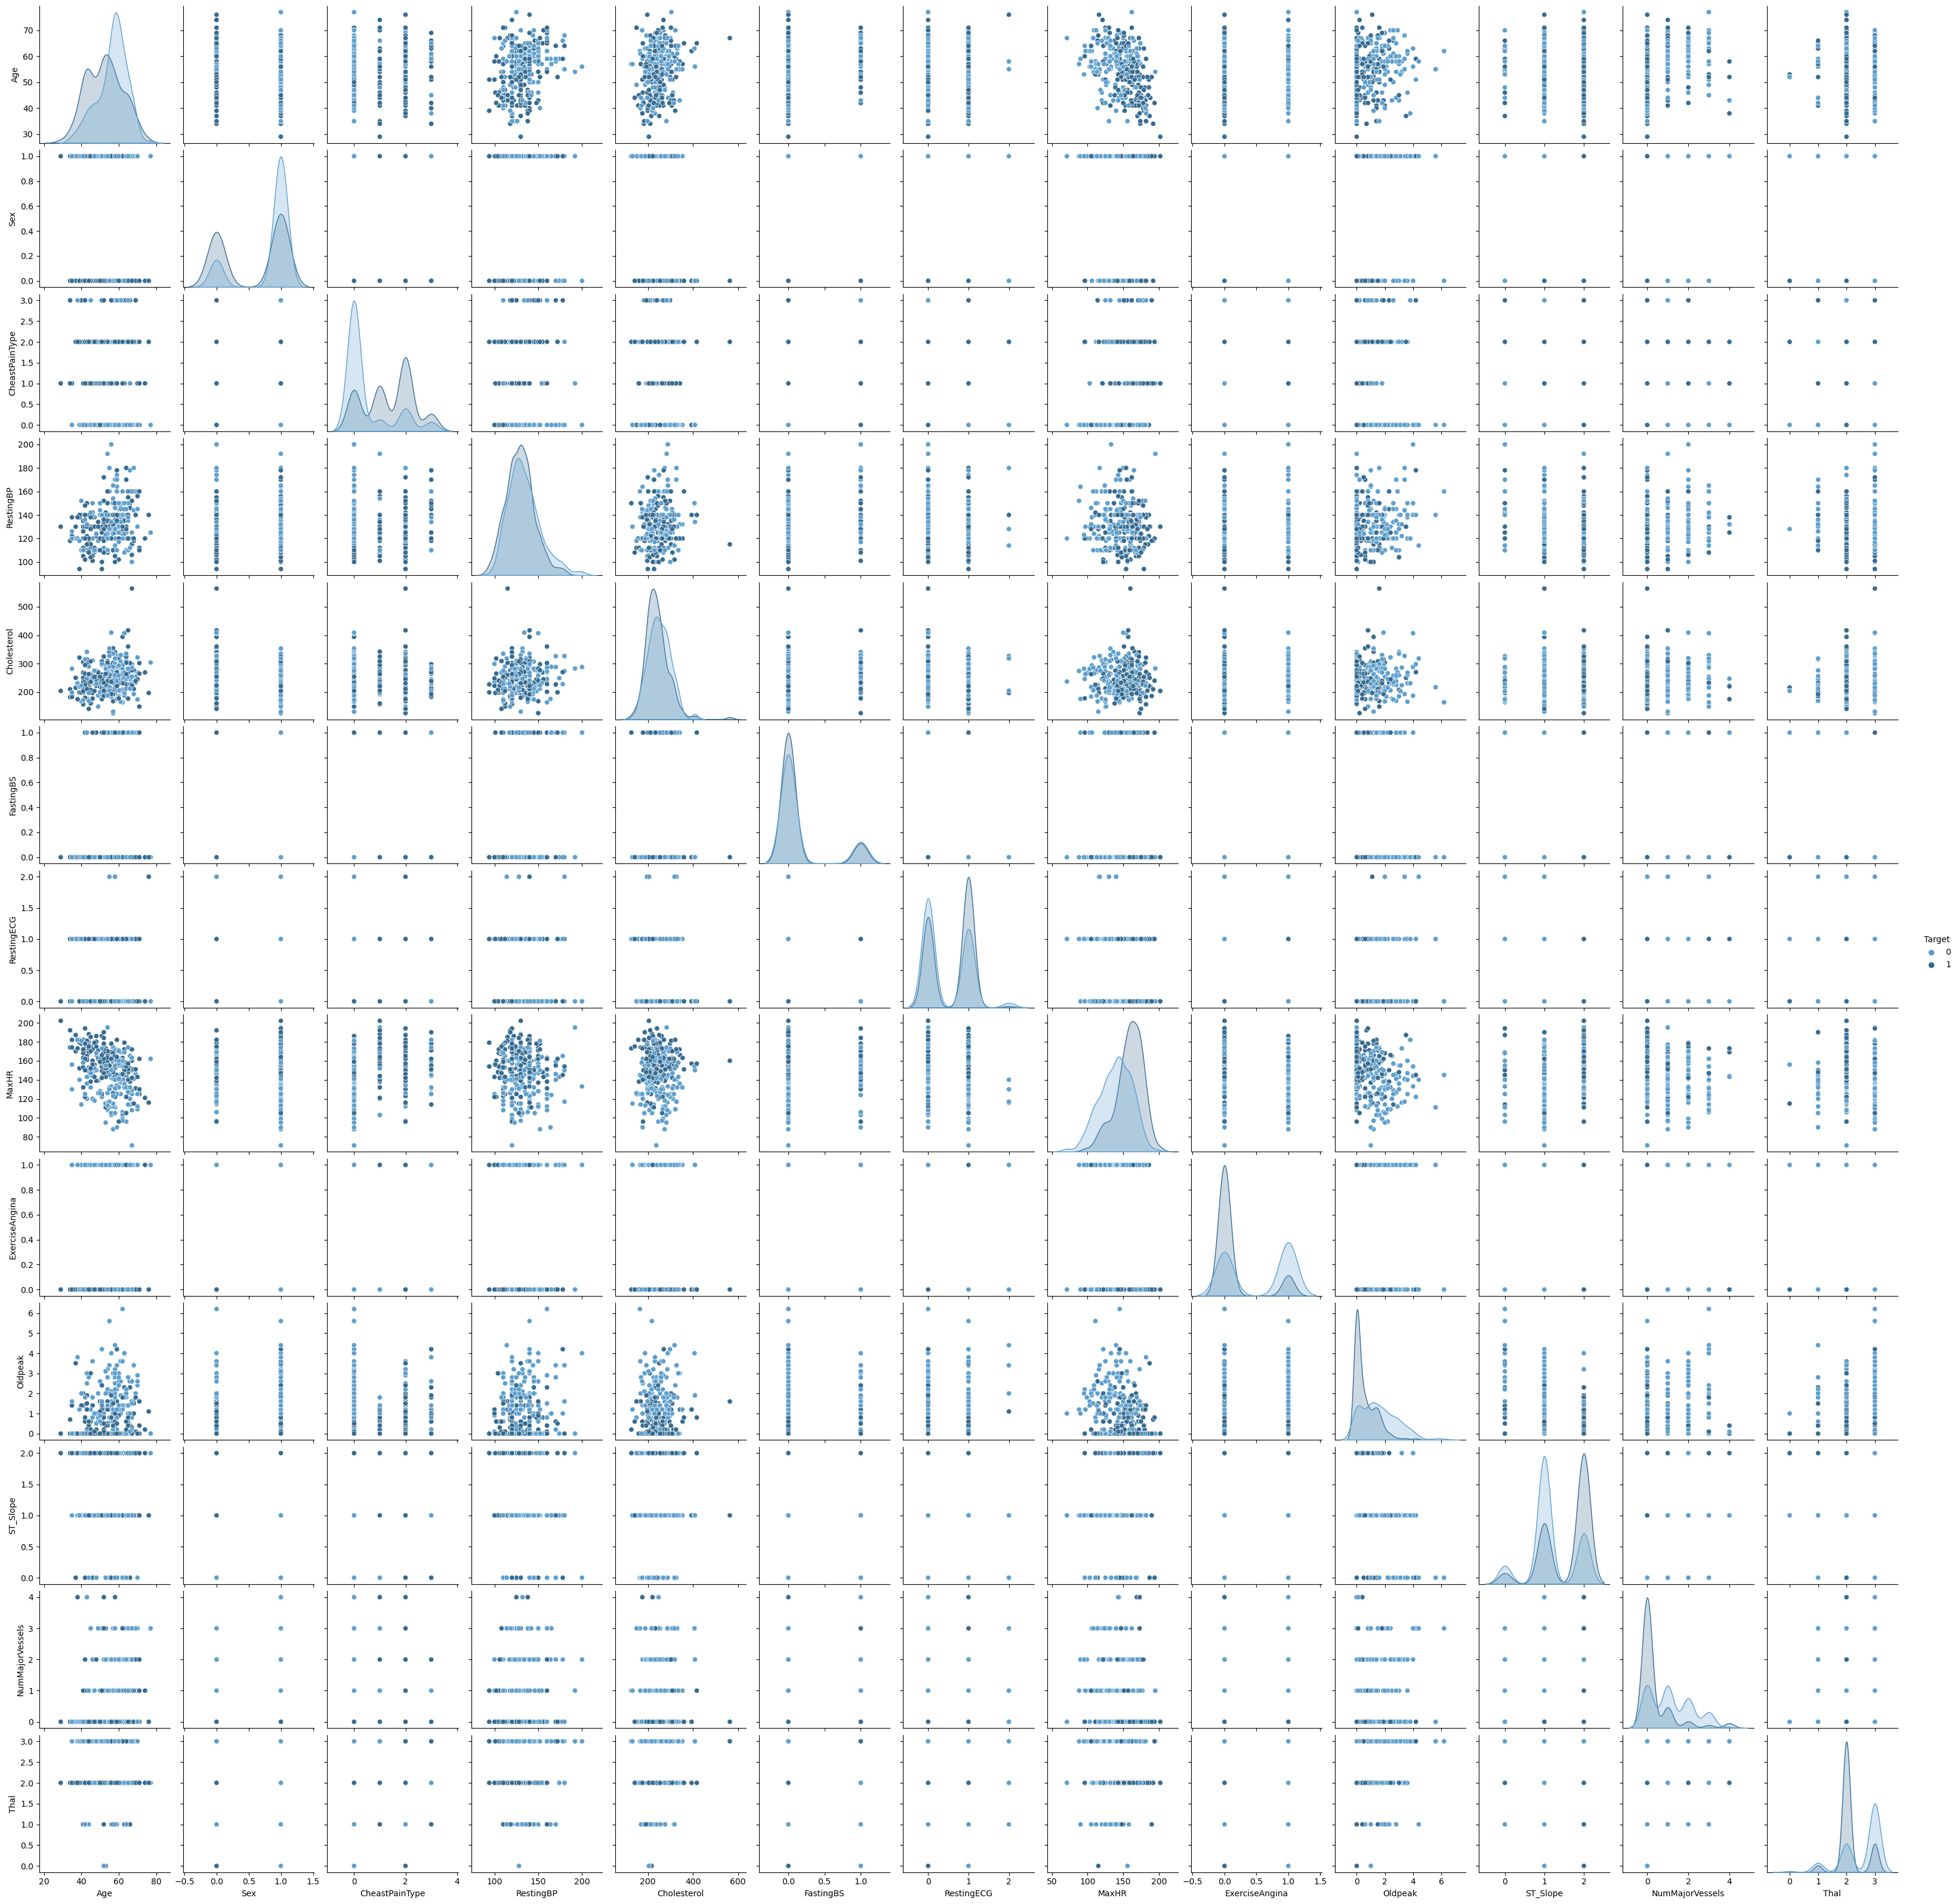

In [16]:
sns.pairplot(df, hue='Target', palette='Blues_d')
plt.show()

From this result, I can see that there are many `repetitive things` in the data.

In [17]:
# Get the not repetitive
unique_values_in_df = pd.unique(df.values.ravel())

# Count unique values
unique_count_in_df = len(unique_values_in_df)

print("The Not repetitive:", unique_count_in_df)

The Not repetitive: 305


🚨 The dataset contains only `305 unique values`, which indicates that many individuals share identical medical conditions. This could suggest either a high prevalence of certain diseases or that the data has been `collected from a specific location` or `demographic group`.

--------------

## Algorithm Selection
As we know above, the result is `only 2`, so all algorithms follow the `classification`.

### Classification Algorithms
### 1. Linear Models
- **Logistic Regression**: 
- **Linear Discriminant Analysis** (LDA):
- **Support Vector Machines** (Linear Kernel)
- **Quadratic Discriminant Analysis** (QDA)

### 2. Non-Linear Models
- **Decision Trees**
- **Random Forest**
- **k-Nearest Neighbors** (k-NN)
- **Naive Bayes**
- **Support Vector Machines** (Non-linear Kernel)
- **Artificial Neural Networks** (ANN)
- **Gradient Boosting Machines** (GBM)
- **AdaBoost**
- **XGBoost / LightGBM**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop(columns=["Target"])  # Replace "target" with your dataset's target column name
y = df["Target"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (820, 13)
Testing data shape: (205, 13)


In [19]:
# Linear Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

# Non-Linear Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Gradient Boosting Variants
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [20]:

models = {
    # 1. Linear Models
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Support Vector Machines (Linear Kernel)": SVC(kernel="linear", probability=True),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis(),
    # 2. Non-Linear Models
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machines (Non-linear Kernel)": SVC(probability=True),  # Default kernel is RBF (non-linear)
    "Artificial Neural Networks (ANN)": MLPClassifier(max_iter=1000),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [21]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [22]:
import time
import numpy as np
from sklearn.model_selection import cross_validate

# Assuming models is a dictionary containing the models like 'KNN', 'Decision Tree', etc.

results = []

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time.time()  # Start time for performance measurement
    
    # Perform cross-validation
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    
    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    
    elapsed_time = time.time() - start_time  # Calculate elapsed time
    
    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Elapsed Time (seconds)': elapsed_time
    })
    
    # Print model performance and elapsed time
    print(f"{name} completed in {elapsed_time:4f} seconds.")
    
# You can also print or plot the results
for result in results:
    print(result)


Logistic Regression completed in 0.068787 seconds.
Linear Discriminant Analysis (LDA) completed in 0.052610 seconds.
Support Vector Machines (Linear Kernel) completed in 0.335632 seconds.
Quadratic Discriminant Analysis (QDA) completed in 0.033031 seconds.
Decision Tree completed in 0.036038 seconds.
Random Forest completed in 0.851831 seconds.
k-Nearest Neighbors (k-NN) completed in 0.094127 seconds.
Naive Bayes completed in 0.034144 seconds.
Support Vector Machines (Non-linear Kernel) completed in 0.361593 seconds.
Artificial Neural Networks (ANN) completed in 6.025161 seconds.
Gradient Boosting Machines (GBM) completed in 0.662429 seconds.
AdaBoost completed in 0.442857 seconds.
XGBoost completed in 0.416954 seconds.
[LightGBM] [Info] Number of positive: 339, number of negative: 317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGB

In [23]:
# Convert results into a DataFrame for better 5 visualization
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False).head(5)

results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Elapsed Time (seconds)
9,Artificial Neural Networks (ANN),0.980488,0.972767,0.990560,0.981393,0.987020,6.025161
5,Random Forest,0.980488,0.975140,0.988235,0.981291,0.996739,0.851831
13,LightGBM,0.980488,0.975140,0.988235,0.981291,0.992557,0.365154
12,XGBoost,0.980488,0.977137,0.985882,0.981211,0.990591,0.416954
4,Decision Tree,0.980488,0.979124,0.983473,0.981075,0.980455,0.036038


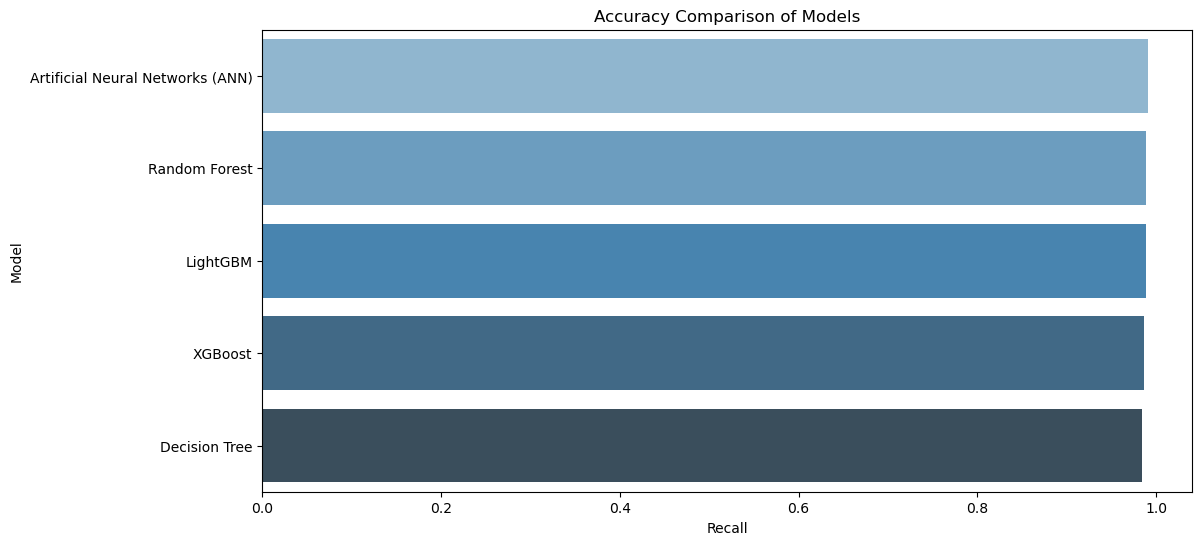

In [24]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="Recall", y="Model", data=results_df, palette='Blues_d')
plt.title("Accuracy Comparison of Models")
plt.show()

In [25]:
models_1 = {
    # 2. Non-Linear Models
    "Artificial Neural Networks (ANN)": MLPClassifier(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

results = []

for name, model in models_1.items():
    model.fit(X_train, y_train)  
    train_pred = model.predict(X_train)  
    test_pred = model.predict(X_test)    
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    results.append((name, train_acc, test_acc))

print(f"{'Model':<40}{'Training Accuracy':<20}{'Testing Accuracy'}")
for name, train_acc, test_acc in results:
    print(f"{name:<40}{train_acc:<20.4f}{test_acc:.4f}")

[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
M

In [27]:
from sklearn.model_selection import cross_val_score

cv_splits = 5

cv_results = []

for name, model in models_1.items():
    scores = cross_val_score(model, X, y, cv=cv_splits, scoring='accuracy')
    
    mean_score = scores.mean()
    std_score = scores.std()
    
    cv_results.append((name, mean_score, std_score))

print(f"{'Model':<40}{'Mean CV Accuracy':<20}{'Std Deviation'}")
for name, mean_score, std_score in cv_results:
    print(f"{name:<40}{mean_score:<20.4f}{std_score:.4f}")


[LightGBM] [Info] Number of positive: 421, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513415 -> initscore=0.053671
[LightGBM] [Info] Start training from score 0.053671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

--------

### Simple Explanation of the Methods:
**`Training vs Testing Accuracy:`**
Here, we compare the model's accuracy on the training data versus its accuracy on the testing data. If the training accuracy is high while the testing accuracy is low, it indicates a problem of Overfitting (the model is too closely fitted to the training data). On the other hand, if both training and testing accuracies are low, it indicates Underfitting (the model is not well fitted to the data).

**`Cross-Validation (CV):`**
With Cross-Validation, the data is divided into multiple subsets (or folds), and the model is tested on each subset separately. This technique is used to test the stability of the model and avoid Overfitting, as the model's performance should be consistent across all subsets.

**`Results:`**
Models like Random Forest, LightGBM, XGBoost, and Decision Tree performed very well and did ***not show signs of Overfitting***.
ANN (Artificial Neural Networks) ***showed Underfitting*** and need further improvements.


----

## Random Forest 🎊🎊

**OOB Error (Out-of-Bag Error)**
refers to the error rate of the predictions made using the data that was not used in training the individual trees within the Random Forest model. This means that OOB Error represents the model's performance on a set of data that was not used during the training process.

In [42]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)
print(f'OOB Error: {(1 - rf.oob_score_)*100:.4f}%')

OOB Error: 0.6098%


In [43]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)

print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
#Pest Random Forest Classifier
rf = RandomForestClassifier(max_depth = None ,min_samples_split = 2 ,n_estimators = 200 ,oob_score=True)
rf.fit(X_train, y_train)
print(f'OOB Error: {(1 - rf.oob_score_)*100:.4f}%')

OOB Error: 0.4878%


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(X_test))

cm

array([[102,   0],
       [  3, 100]], dtype=int64)

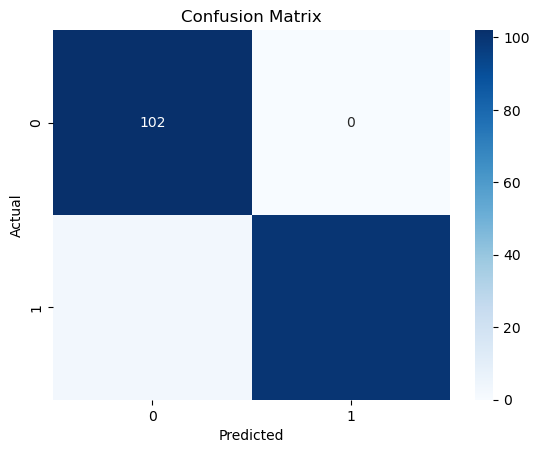

In [49]:
# رسم مصفوفة الالتباس
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

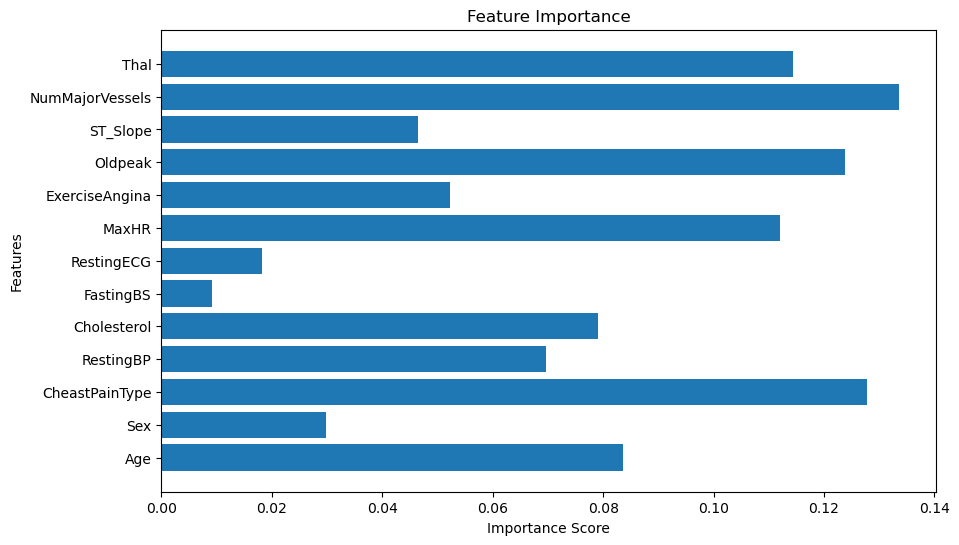

In [50]:
# Get feature importance
importance = rf.feature_importances_
feature_names = X.columns
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()